# Analyzing Spatial data from the GoFord bike sharing service
## by Lucas Valério de Oliveira

## Investigation Overview

In this investigation we will look for the spatial distributions of bike stations and understand the relationship between the time variables, duration of trips and urban mobility between Macro and Micro regions established by means of cauterization method K Means.

## Dataset Overview

The data has 183412 rows of records and 16 columns of data. Some tables have null data that needs to be analyzed to decide whether to be treated or remove. egarding the type of data, it is observed that date and time variables need to be treated for the DateTime type. Fields that have some ID identifier need to be converted to String, and finally the Birthday Year variable deve der analisada, uma vez que foi identificado individuos should be analyzed, since it was identified individuals who have a date of birth of 1878 and therefore we should analyze the case. Finally, the data are from the period of February 2019

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import time

%matplotlib inline

In [2]:
#Save clean data as master
master_df = pd.read_csv('clean_master_fordgobike.csv')

In [3]:
master_df = master_df[master_df['duration_sec'] < 3600]

## Starting point

It was necessary to evaluate whether the trips had consistent latitude and longitude data and this was possible to verify by plotting the point dispersion plots with the coordinate axes being latitude and longitude, respectively.

In [4]:
f, ax = plt.subplots(1,2,figsize=(15,7))
plot_start = sns.scatterplot(ax=ax[0],data=master_df,x='start_station_latitude',y='start_station_longitude');
plot_end = sns.scatterplot(ax=ax[1],data=master_df,x='end_station_latitude',y='end_station_longitude');

We can note that by the distribution obtained there is a great consistency of spatial information and they seem to have well-defined regions in space that can be used to differentiate characteristics between regions

## Need to group by regions

Geographic data alone would not add much to the data analysis, since we should know one thing in common between them and the only information we knew was the name of the bike stations. For this, a grouping function was used through the K-Mean clustering model that seeks to assign a common centroide among the number of predefined groups.

### Delimitation of Study Groups

Two approaches have been defined:
1. Macro regions (3 Clusters)
2. Micro regions (6 Cluesters)

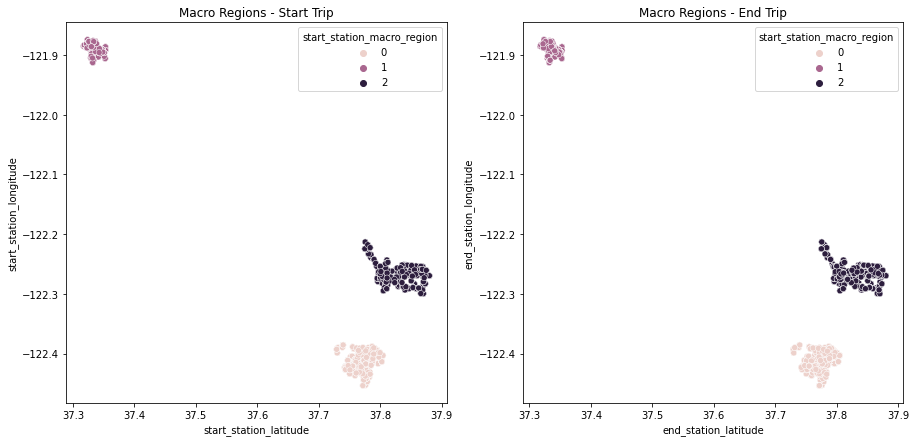

In [5]:
f, ax = plt.subplots(1,2,figsize=(15,7))
plot_start = sns.scatterplot(ax=ax[0],data=master_df,
                             x='start_station_latitude',y='start_station_longitude', hue="start_station_macro_region");

plot_end = sns.scatterplot(ax=ax[1],data=master_df,
                           x='end_station_latitude',y='end_station_longitude', hue="start_station_macro_region");
ax[0].set_title('Macro Regions - Start Trip');
ax[1].set_title('Macro Regions - End Trip');

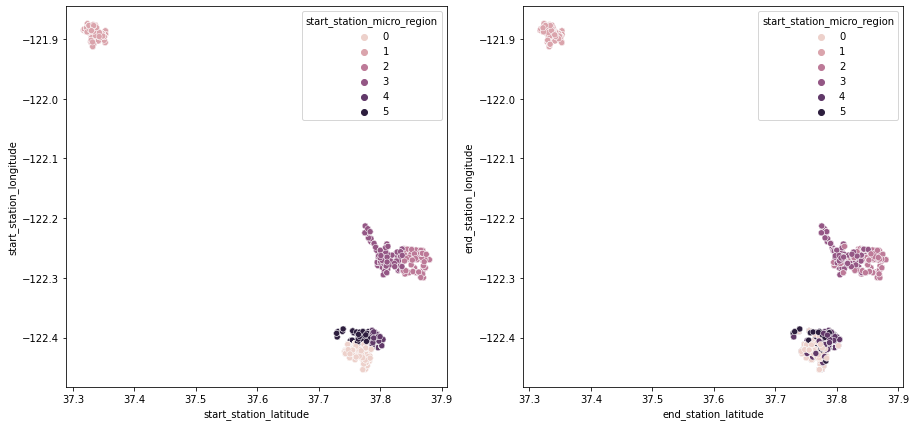

In [6]:
f, ax = plt.subplots(1,2,figsize=(15,7))
plot_start = sns.scatterplot(ax=ax[0],data=master_df,
                             x='start_station_latitude',y='start_station_longitude', hue="start_station_micro_region");

plot_end = sns.scatterplot(ax=ax[1],data=master_df,
                           x='end_station_latitude',y='end_station_longitude', hue="start_station_micro_region");

### Macro Region 0

The results show that the people in the center of region 0 have long displacements in the peripheries of the region, evidenced by the first graph and short displacements in the centers.

Graph two shows that the short displacements made in the region are widely used both by the morning and in the afternoon, while in the peripheries the schedule tends to be used in the morning or in the afternoon, this can be the effect of the people who will perform the task in the central region and at the end of the day returns to their homes.

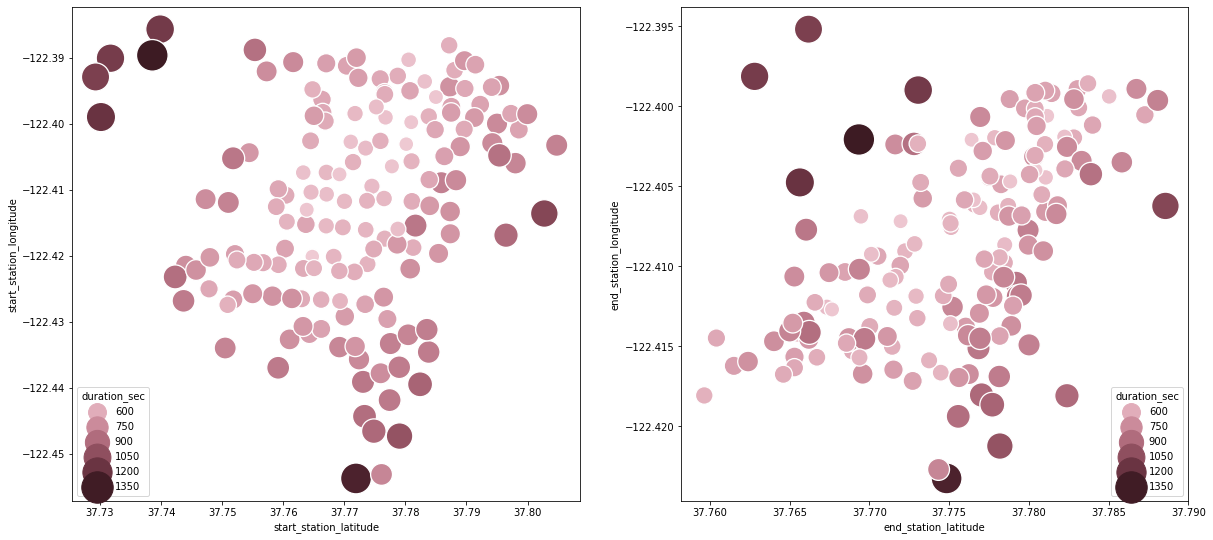

In [7]:
macro0 = master_df[master_df['start_station_macro_region'] == 0].groupby('start_station_name').mean()
plt.figure(figsize = [20, 20]);
ax= plt.subplot(2, 2, 1);
sns.scatterplot(x="start_station_latitude", y="start_station_longitude",hue='duration_sec',
                   size='duration_sec', sizes=(200, 1000) ,data=macro0,palette = 'ch:s=0.8,rot=0')
ax = plt.subplot(2, 2, 2);
sns.scatterplot(x="end_station_latitude", y="end_station_longitude",hue='duration_sec',
                   size='duration_sec', sizes=(200, 1000) ,data=macro0,palette = 'ch:s=0.8,rot=0');

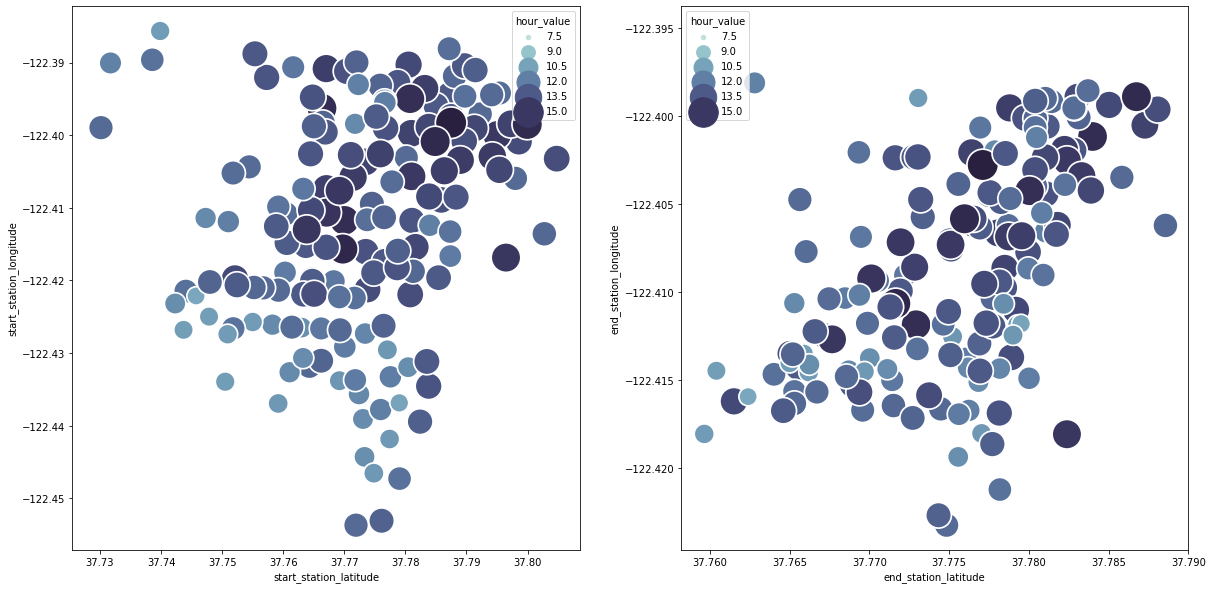

In [8]:
plt.figure(figsize = [20, 10]);
ax= plt.subplot(1, 2, 1);
sns.scatterplot(x="start_station_latitude", y="start_station_longitude",hue='hour_value',
                   size='hour_value', sizes=(0, 1000) ,data=macro0,palette = 'ch:s=.25,rot=-.35')
ax = plt.subplot(1, 2, 2);
sns.scatterplot(x="end_station_latitude", y="end_station_longitude",hue='hour_value',
                   size='hour_value', sizes=(0, 1000) ,data=macro0,palette = 'ch:s=.25,rot=-.35');

In [9]:
macro0_stations = master_df[master_df['start_station_macro_region'] == 0]
plt.figure(figsize = [20, 10]);
ax= plt.subplot(1, 2, 1);
sns.scatterplot(x="start_station_latitude", y="start_station_longitude",hue='start_station_micro_region',
                    s=300,data=macro0_stations,palette = 'Set2')
ax = plt.subplot(1, 2, 2);
sns.scatterplot(x="end_station_latitude", y="end_station_longitude",hue='start_station_micro_region',
                    s=300,data=macro0_stations,palette = 'Set2');

### Macro region 1

The results of macro region 1 have interesting characteristics, the first is that it is composed of 3 micro regions and that it suffers short displacements in the center and increases as it moves away. An interesting characteristic and the highest average time occurs in the central region, this is due to the return of people to their homes, while in the more remote regions the average time is closer to the first part of the morning, indicating a trip to the center. Finally, the analysis of trips between micro regions is evident in the last graph that shows a displacement from 3 zones to the central position of the data. That is, the most likely destination of the pattern of displacement of people is to the central region and less common to the peripheries.

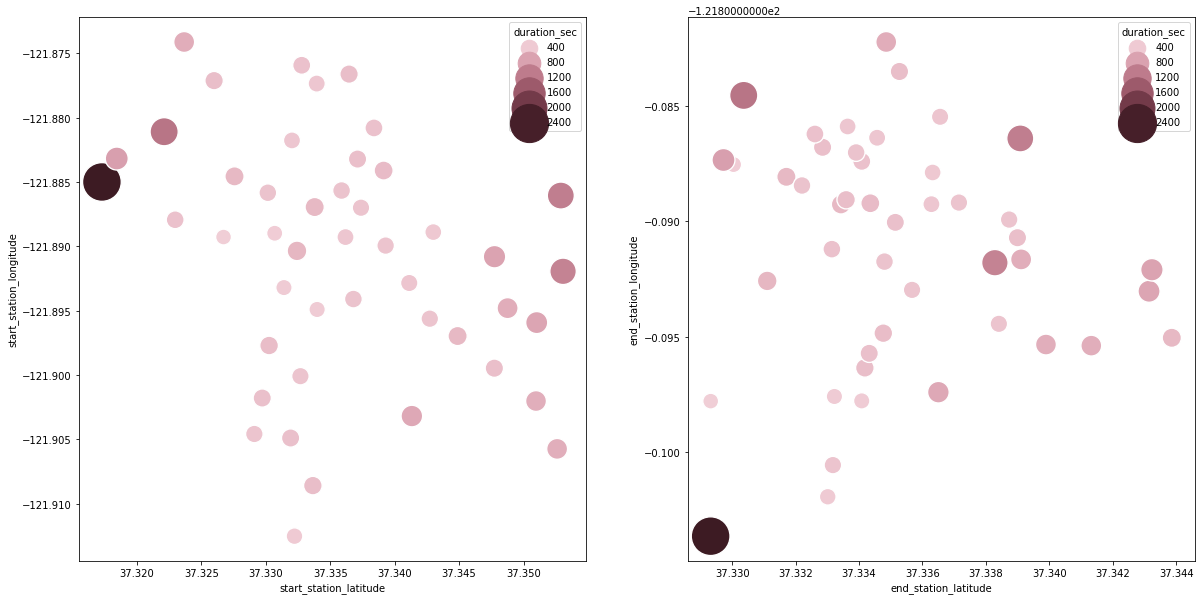

In [10]:
macro1 = master_df[master_df['start_station_macro_region'] == 1].groupby('start_station_name').mean()
plt.figure(figsize = [20, 10]);
ax= plt.subplot(1, 2, 1);
sns.scatterplot(x="start_station_latitude", y="start_station_longitude",hue='duration_sec',
                   size='duration_sec', sizes=(250, 1500) ,data=macro1,palette = 'ch:s=0.8,rot=0')
ax = plt.subplot(1, 2, 2);
sns.scatterplot(x="end_station_latitude", y="end_station_longitude",hue='duration_sec',
                   size='duration_sec', sizes=(250, 1500) ,data=macro1,palette = 'ch:s=0.8,rot=0');

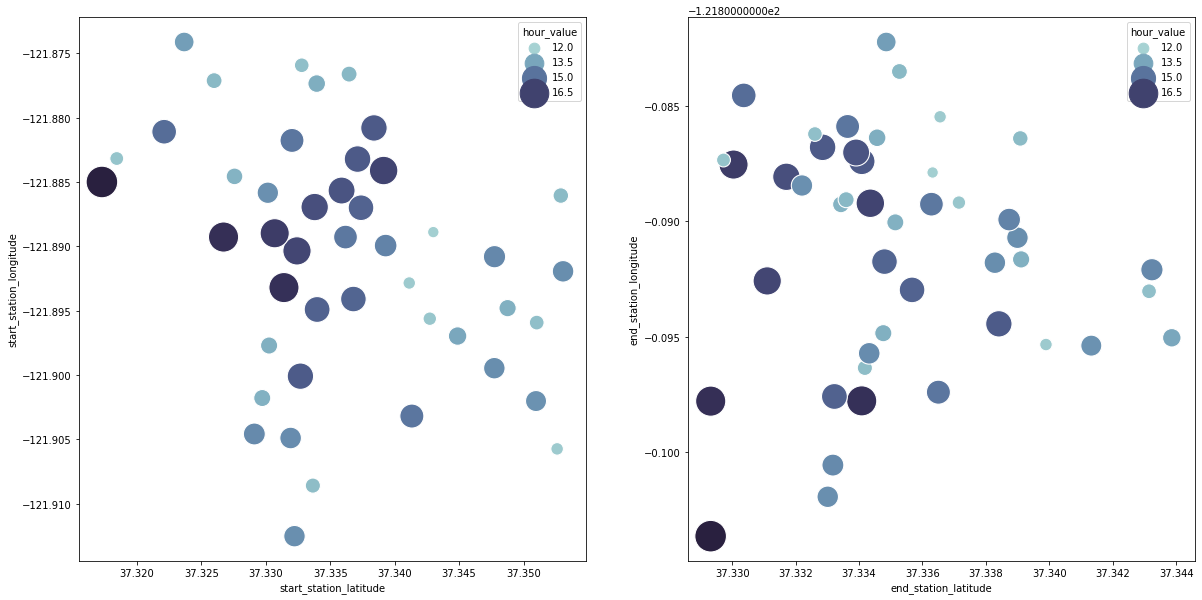

In [11]:
plt.figure(figsize = [20, 10]);
ax= plt.subplot(1, 2, 1);
sns.scatterplot(x="start_station_latitude", y="start_station_longitude",hue='hour_value',
                   size='hour_value', sizes=(0, 1000) ,data=macro1,palette = 'ch:s=.25,rot=-.35')
ax = plt.subplot(1, 2, 2);
sns.scatterplot(x="end_station_latitude", y="end_station_longitude",hue='hour_value',
                   size='hour_value', sizes=(0, 1000) ,data=macro1,palette = 'ch:s=.25,rot=-.35');

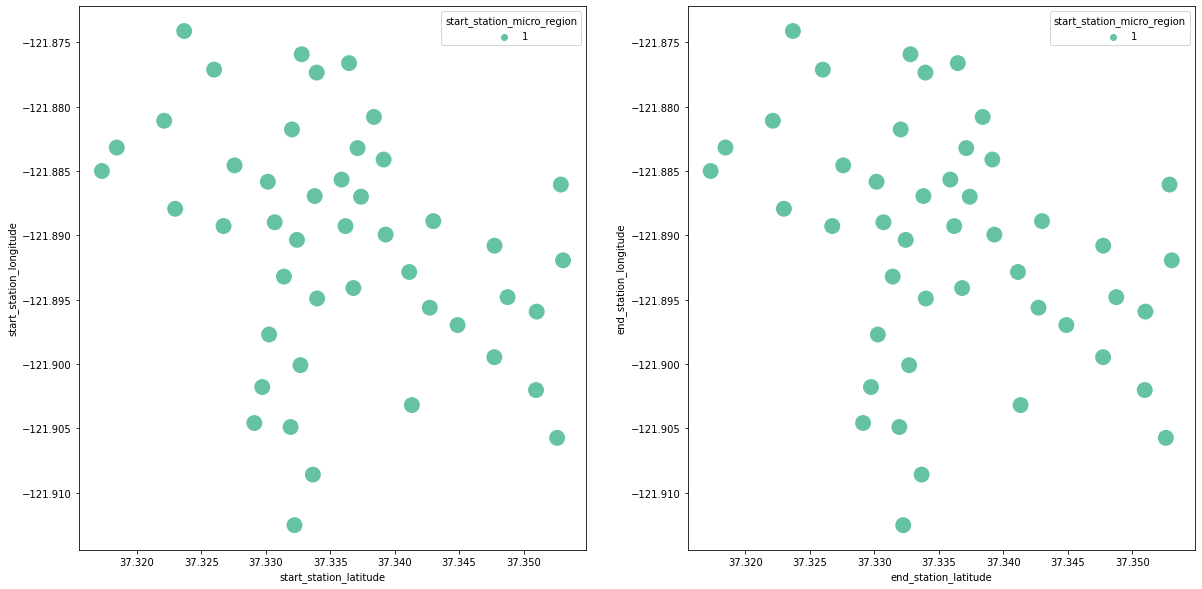

In [12]:
macro1_stations = master_df[master_df['start_station_macro_region'] == 1]
plt.figure(figsize = [20, 10]);
ax= plt.subplot(1, 2, 1);
sns.scatterplot(x="start_station_latitude", y="start_station_longitude",hue='start_station_micro_region',
                    s=300,data=macro1_stations,palette = 'Set2')
ax = plt.subplot(1, 2, 2);
sns.scatterplot(x="end_station_latitude", y="end_station_longitude",hue='start_station_micro_region',
                    s=300,data=macro1_stations,palette = 'Set2');

### Macro region 2

Region 2 has the same behavior of displacement and time of the others, but a curious fact and that when we evaluate the micro regions we observe that there are trips of people who leave the Macro zone 2 and go towards macro zone 1, that is, we have here a mobility between macro zones which we did not observe in previous cases.

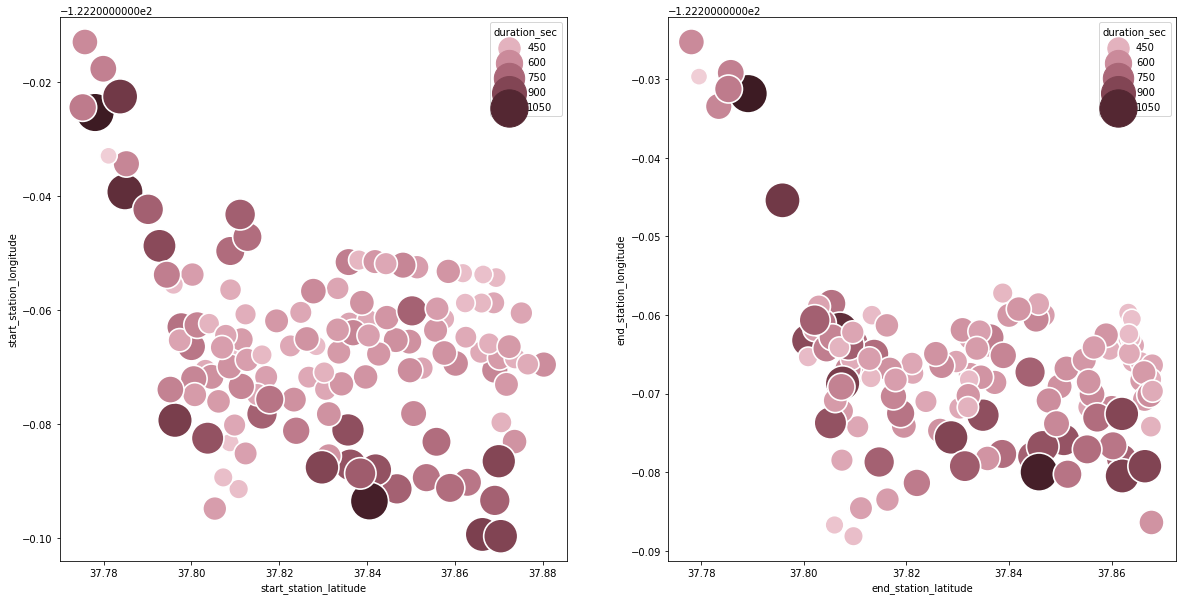

In [13]:
macro2 = master_df[master_df['start_station_macro_region'] == 2].groupby('start_station_name').mean()
plt.figure(figsize = [20, 10]);
ax= plt.subplot(1, 2, 1);
sns.scatterplot(x="start_station_latitude", y="start_station_longitude",hue='duration_sec',
                   size='duration_sec', sizes=(300, 1500) ,data=macro2,palette = 'ch:s=0.8,rot=0')
ax = plt.subplot(1, 2, 2);
sns.scatterplot(x="end_station_latitude", y="end_station_longitude",hue='duration_sec',
                   size='duration_sec', sizes=(300, 1500) ,data=macro2,palette = 'ch:s=0.8,rot=0');

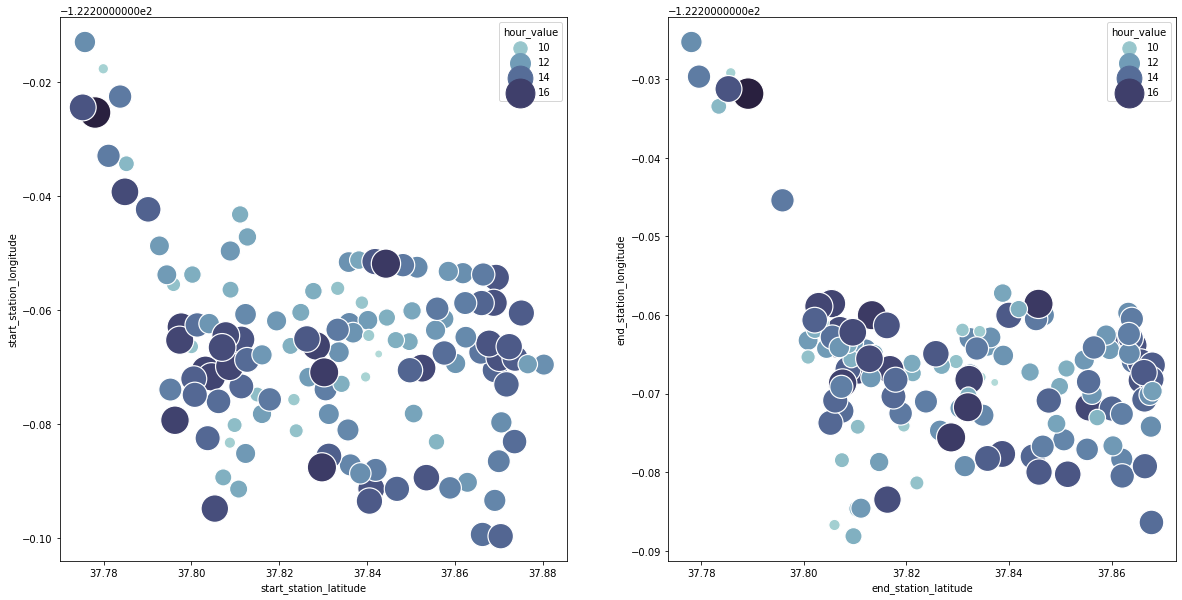

In [14]:
plt.figure(figsize = [20, 10]);
ax= plt.subplot(1, 2, 1);
sns.scatterplot(x="start_station_latitude", y="start_station_longitude",hue='hour_value',
                   size='hour_value', sizes=(0, 1000) ,data=macro2,palette = 'ch:s=.25,rot=-.35')
ax = plt.subplot(1, 2, 2);
sns.scatterplot(x="end_station_latitude", y="end_station_longitude",hue='hour_value',
                   size='hour_value', sizes=(0, 1000) ,data=macro2,palette = 'ch:s=.25,rot=-.35');

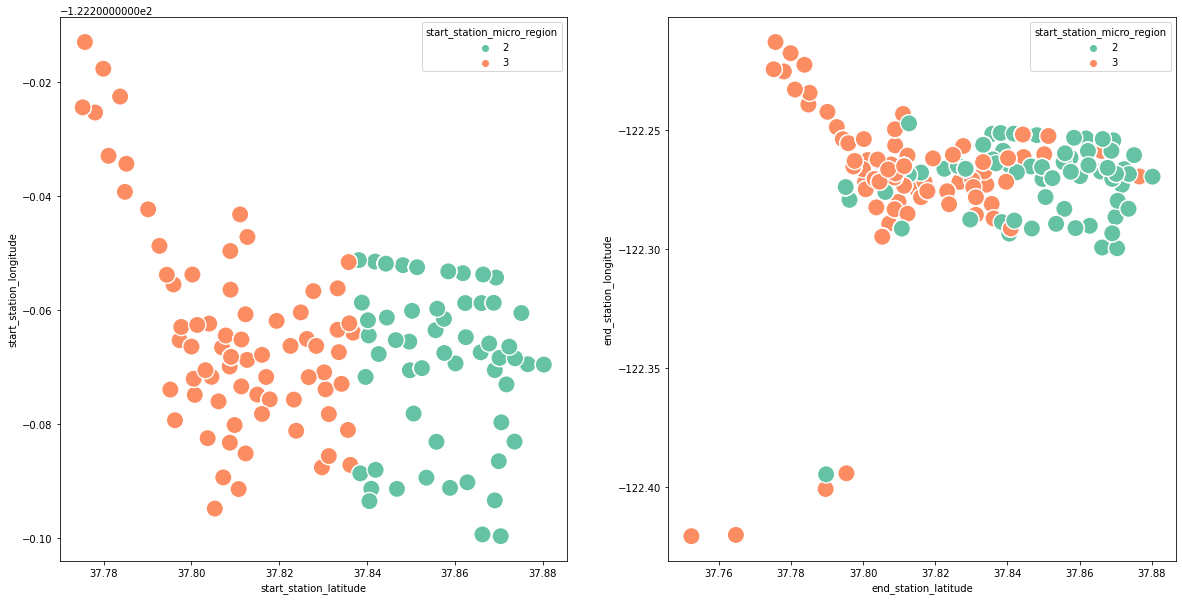

In [15]:
macro2_stations = master_df[master_df['start_station_macro_region'] == 2]
plt.figure(figsize = [20, 10]);
ax= plt.subplot(1, 2, 1);
sns.scatterplot(x="start_station_latitude", y="start_station_longitude",hue='start_station_micro_region',
                    s=300,data=macro2_stations,palette = 'Set2')
ax = plt.subplot(1, 2, 2);
sns.scatterplot(x="end_station_latitude", y="end_station_longitude",hue='start_station_micro_region',
                    s=300,data=macro2_stations,palette = 'Set2');

## References

https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html
https://geopy.readthedocs.io/en/stable/index.html?highlight=latitude#geopy.location.Location.latitude
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://plotly.com/python/scattermapbox/
https://www.geeksforgeeks.org/get-the-city-state-and-country-names-from-latitude-and-longitude-using-python/

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!